### Insights of Exploratory Data Analysis from [2019 Stack Overflow Developer Survey](https://insights.stackoverflow.com/survey).
There are six sections in this survey. 
* Basic Information
* Education, Work, and Career
* Technology and Tech Culture
* Stack Overflow Usage + Community
* Demographic Information
* Survey Review

### Major Python resources used for this analysis
* [MatplotLib](https://matplotlib.org/) 
* [Pandas](https://pandas.pydata.org/)
* [Seaborn](https://seaborn.pydata.org/)

In [1]:
import matplotlib.pyplot as plt  # for plotting graphs
# import required python libraries
import pandas as pd
import seaborn as sns

 # this is used to plot on Juputer notebook console, if you want to have plots as separate window, 
 # please use plt.show()
%matplotlib inline

# load main data set in to Pandas dataframe
df = pd.read_csv('./data/survey_results_public-2019.csv') # main Pandas Df 
# load schema data set in to Pandas DF
schema_df = pd.read_csv('./data/survey_results_schema-2019.csv')
# preview head of the dataset
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
# schema is discribed, what are available features in this data set with the feature definitions.
schema_df.values

array([['Respondent',
        'Randomized respondent ID number (not in order of survey response time)'],
       ['MainBranch',
        'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'],
       ['Hobbyist', 'Do you code as a hobby?'],
       ['OpenSourcer', 'How often do you contribute to open source?'],
       ['OpenSource',
        'How do you feel about the quality of open source software (OSS)?'],
       ['Employment',
        'Which of the following best describes your current employment status?'],
       ['Country', 'In which country do you currently reside?'],
       ['Student',
        'Are you currently enrolled in a formal, degree-granting college or university program?'],
       ['EdLevel',
        'Which of the following best describes the highest level of formal education that you’ve completed?'],
       ['UndergradMajor',
        'What was your main or most important field of study?'],
       ['EduOther',
  

### Questions that are going to be discused in this analysis
* What is the overall job satisfaction in the IT industry?
* What are gender and age differences in job satisfaction?
* How does education relate to job satisfaction?
* How does income level affect job satisfaction?

In [3]:
"""
Pandas value_counts is an inbuilt pandas function that returns an object containing counts of 
unique values in sorted order. 
"""
df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

Text(0, 0.5, 'Number of Respondents')

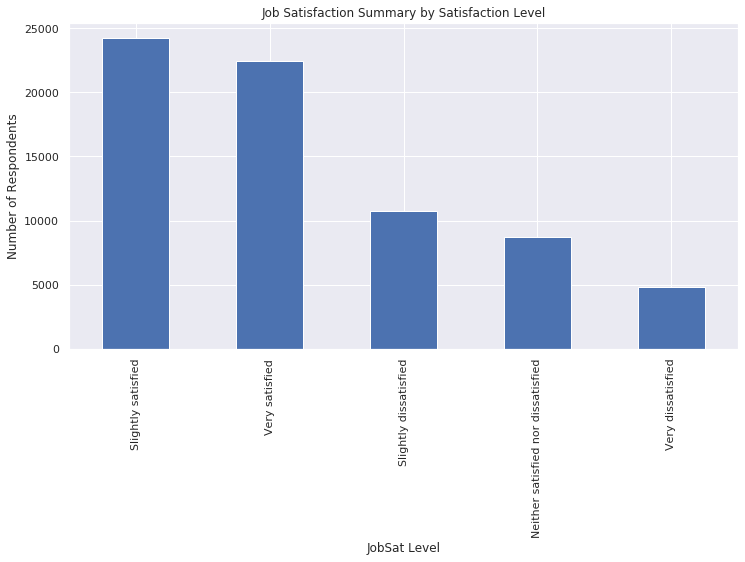

In [4]:
# setting the font scale for matplot graphs
sns.set(font_scale=1)
# Exploratory visualization for `JobSat` colunm, using summetion of each qunique values in `JobSat`. i.e JobSat level
df['JobSat'].value_counts().plot.bar(figsize=(12, 6))

# matplotlib decorations for the graph
plt.title('Job Satisfaction Summary by Satisfaction Level') # titile 
plt.xlabel('JobSat Level') # X - axis 
plt.ylabel('Number of Respondents') # Y -axis 

A total of 24207 of the employees were slightly satisfied, and another 22452 were very satisfied. Added together, these two groups formed 46659 of the samples. Slightly dissatisfied and very dissatisfied employees were only 10752 and 4857 respectively. It can conclude that most of the employees are satisfied with their job among all respondents.  

In [5]:
# formating and grouping `Gender` with more readable 
df.loc[(df['Gender']  !='Man') & (df['Gender'] !='Woman'), 'Gender'] = 'Other'
df.loc[ df['Gender']  =='Man', 'Gender'] = 'Male'
df.loc[ df['Gender']  =='Woman', 'Gender'] = 'Female'

In [6]:
# remoev missing values for `JobSat` column
df['JobSat'].dropna(axis=0)

2                        Slightly satisfied
3                        Slightly satisfied
4                     Slightly dissatisfied
5                        Slightly satisfied
6        Neither satisfied nor dissatisfied
                        ...                
88326    Neither satisfied nor dissatisfied
88327    Neither satisfied nor dissatisfied
88328    Neither satisfied nor dissatisfied
88329                     Very dissatisfied
88330                 Slightly dissatisfied
Name: JobSat, Length: 70988, dtype: object

In [7]:
# select values for Job Satisfaction
job_sat_vals = ['Slightly satisfied','Very satisfied']
# select values for Job Dissatisfaction
job_dis_sat_vals = ['Slightly dissatisfied','Very dissatisfied']

In [8]:
# create a Pandas DF for most job satisfaction respondents
sat_job_respondents_df = df.copy()[(df['JobSat'] == job_sat_vals[0] ) | (df['JobSat'] == job_sat_vals[1])]
# create a Pandas DF fot least job satisfaction respondents
dis_sat_job_respondents_df = df.copy()[(df['JobSat'] == job_dis_sat_vals[0] ) | (df['JobSat']== job_dis_sat_vals[1])]

In [9]:
# assign a common value for `JobSat` in satisfaction respondent DF
sat_job_respondents_df.loc[:, 'JobSat'] = 'Satisfied'
# assign a common value for `JobSat` in dissatisfaction respondent DF
dis_sat_job_respondents_df.loc[:, 'JobSat'] = 'Dissatisfied'

In [10]:
# merge sat and dis sat dfs as one df using Pandas concat function
job_sat_respondents_df = pd.concat([sat_job_respondents_df, dis_sat_job_respondents_df], axis=0)

### Question 01
**Question 01:** What is the overall job satisfaction in the IT industry?

Text(0.5, 1.0, 'Overall Job Satisfaction Summary')

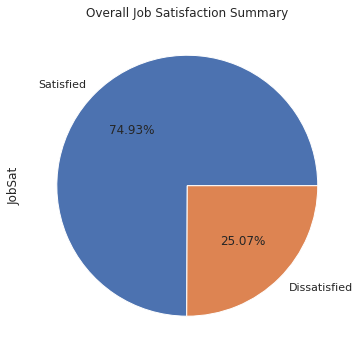

In [11]:
# setting the font scale for matplot graphs
sns.set(font_scale=1)
# draw a pie chart for `Overall Job Satisfaction` with common `JobSat` values. i.e Satisfied and Dissatisfied
job_sat_respondents_df['JobSat'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(12, 6))
# set the title of the pie chart
plt.title('Overall Job Satisfaction Summary')

**Overall, 74.93 percent of employees are satisfied, whereas 25.07 percent are dissatisfied**

In [12]:
def merge_sat_and_dsat_by_cols(col):
    """
    INPUT:
        the column name that is joined two dataframes as an one dataframe.
    
    OUTPUT:
        merge df by using selected column
    """
    
    sat_job_df = sat_job_respondents_df.groupby([col]).size().sort_values(ascending=False)\
    .reset_index(name='SatCount')
    
    dis_sat_job_df = dis_sat_job_respondents_df.groupby([col]).size().sort_values(ascending=False)\
    .reset_index(name='DisSatCount')
    
    return pd.merge(sat_job_df, dis_sat_job_df , on=col)


In [13]:
def calculate_sat_and_dsat_pecentage(merged_df):
    """
    INPUT:
        merged pandas Df, that is required to append new columns `SatPercentage`,`DisSatPercentage`, and `TotalPercentage`
        i.e TotalPercentage = (SatCount+DisSatCount)/ (SatCount.Sum + DisSatCount.Sum) * 100
        
    OUTPUT:
        A Pandas Df, that is inclued with new columns with percentages
    """
    # add `SatPercentage` to merged DF
    merged_df['SatPercentage'] = merged_df['SatCount'] / (merged_df['SatCount'] + merged_df['DisSatCount']) 
    # format `SatPercentage` values in DF
    merged_df['SatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['SatPercentage']], 
                                           index = merged_df.index)
    # add `DisSatPercentage` to merged DF
    merged_df['DisSatPercentage'] = merged_df['DisSatCount'] / (merged_df['SatCount']+merged_df['DisSatCount'])
    # format `DisSatPercentage` 
    merged_df['DisSatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['DisSatPercentage']], 
                                              index = merged_df.index)
    # total column for each row
    total = merged_df['SatCount'] + merged_df['DisSatCount']
    # summention of the all rows
    total_sum = merged_df['SatCount'].sum() + merged_df['DisSatCount'].sum()
    merged_df['Total'] =  total
    
    # add `TotalPercentage` to merged DF
    merged_df['TotalPercentage'] = total/total_sum
    # format `TotalPercentage`
    merged_df['TotalPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['TotalPercentage']], 
                                              index = merged_df.index)
    
    # sort and return merged DF
    return merged_df.sort_values(by='SatPercentage', ascending=False).reset_index(drop=True)

### Question 2
**Question 2:** What are gender and age differences in job satisfaction?

#### Gender of Employees by Job Satisfaction

In [14]:
# create a merged DF using `Gender` column
merged_gender_df = merge_sat_and_dsat_by_cols('Gender')

In [15]:
# calculate row percentages and all column percentages for merged_gender_df
calculate_sat_and_dsat_pecentage(merged_gender_df)

,Gender,SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,Female,3319,1036,76.21%,23.79%,4355,6.99%
1,Male,41481,13865,74.95%,25.05%,55346,88.88%
2,Other,1859,708,72.42%,27.58%,2567,4.12%


**Concerning gender, about 88.88 percent were males whereas 6.99. percent were females. The level of job satisfaction by gender did not show much difference with more than 74 percent of both males and females were satisfied with their job.**

#### Age Group of Employees by Job Satisfaction

In [16]:
# age group column name
age_group_col_name = 'AgeGroup(Years)'
# age groups labels
age_group_labels = ['15-24', '25-34','35-44','45-54','55-64']
# age group inbouds and out bounds
age_group_bins = [14, 24, 34, 44, 54, 64]
# add new column `AgeGroup(Years)` to sat_job_respondents_df 
sat_job_respondents_df.loc[:,age_group_col_name] = pd.cut(sat_job_respondents_df['Age'], 
                                                          bins=age_group_bins, labels=age_group_labels)

# add new column `AgeGroup(Years)` to dis_sat_job_respondents_df
dis_sat_job_respondents_df.loc[:,age_group_col_name] = pd.cut(dis_sat_job_respondents_df['Age'], 
                                                              bins=age_group_bins,labels=age_group_labels)

In [17]:
# create a merged df using `AgeGroup(Years)` column
merged_age_group_df = merge_sat_and_dsat_by_cols(age_group_col_name)

In [18]:
# calculate row percentages and all column percentages for merged_age_group_df
calculate_sat_and_dsat_pecentage(merged_age_group_df)

,AgeGroup(Years),SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,55-64,843,240,77.84%,22.16%,1083,1.90%
1,15-24,8017,2429,76.75%,23.25%,10446,18.37%
2,35-44,8813,2966,74.82%,25.18%,11779,20.72%
3,25-34,22500,7584,74.79%,25.21%,30084,52.91%
4,45-54,2593,876,74.75%,25.25%,3469,6.10%


**The largest age group of the employees amounting to 52.91 percent was in the age group of between 25 and 34 years. The smallest age group was 55 years or above, with about 1.90 percent of the total. The finding reflects that the employees in the IT industry were relatively young. The young group was less satisfied, as opposed to the older satisfied group. There was no much job level satisfaction difference among employees who were in age groups 25–34, 35–44, and 45–54.**

Text(0.5, 1.0, 'Job Dissatisfaction By Age Groups')

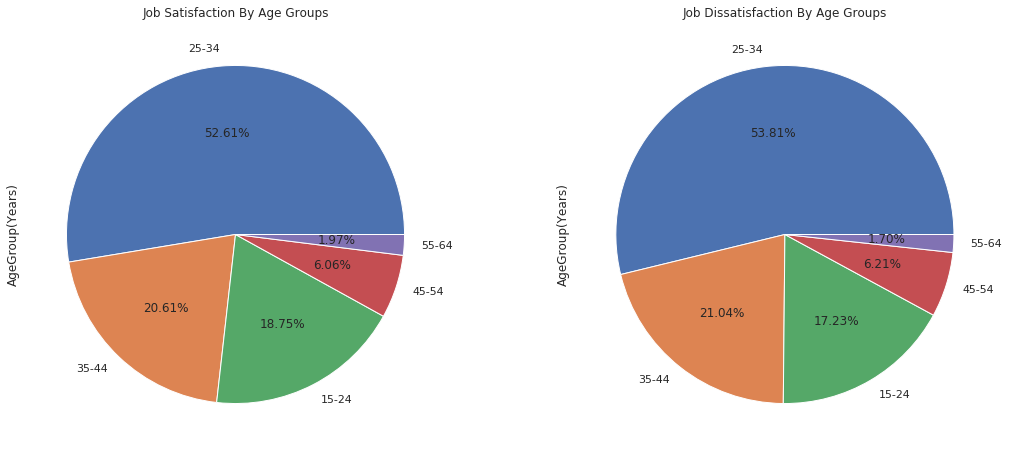

In [19]:
# create matplotlib subplot for satisfaied and dissatisfied age groups
# row count =1
# column count = 2
# with squire figures
fig ,axs = plt.subplots(1,2, figsize=(15, 15))
# common configurations for subplots in matplotlib
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

# draw a plot for satisfaied respondents
sat_job_respondents_df[age_group_col_name].value_counts().plot(kind='pie', ax=axs.flatten()[0], autopct='%1.2f%%')
# set the satisfied job respondent's pie chart title
axs[0].set_title('Job Satisfaction By Age Groups')

# draw a plot for dissatisfied respondents
dis_sat_job_respondents_df[age_group_col_name].value_counts().plot(kind='pie', ax=axs.flatten()[1], autopct='%1.2f%%')
# set the dissatisfied job respondent's pie chart title
axs[1].set_title('Job Dissatisfaction By Age Groups')

### Question 3
**Question 3:** How does education relate to job satisfaction?

**Employees who had a higher level of education are more satisfied**

In [20]:
# create a merged df for `EdLevel` column
merged_edl_df = merge_sat_and_dsat_by_cols('EdLevel')

In [21]:
# calculate row percentages and all column percentages for merged_edl_df
calculate_sat_and_dsat_pecentage(merged_edl_df)

,EdLevel,SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,"Other doctoral degree (Ph.D, Ed.D., etc.)",1592,395,80.12%,19.88%,1987,3.25%
1,"Secondary school (e.g. American high school, G...",2433,702,77.61%,22.39%,3135,5.12%
2,Associate degree,1537,476,76.35%,23.65%,2013,3.29%
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",11805,3849,75.41%,24.59%,15654,25.58%
4,Some college/university study without earning ...,5252,1734,75.18%,24.82%,6986,11.42%
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",22297,7691,74.35%,25.65%,29988,49.00%
6,Primary/elementary school,220,93,70.29%,29.71%,313,0.51%
7,"Professional degree (JD, MD, etc.)",565,287,66.31%,33.69%,852,1.39%
8,I never completed any formal education,178,94,65.44%,34.56%,272,0.44%


**Concerning job satisfaction level, 80.12 percent of the employees who had a doctoral degree were satisfied with their job. This value is relatively high compared to 65.44 percent of satisfied employees who had no formal education. The finding to some extent indicates that those who obtained a higher level of education experience a high level of satisfaction.**

**Employees who had studied in different fields are more satisfied**

In [22]:
# create a merged df for `UndergradMajor` column
merged_unmajor_df = merge_sat_and_dsat_by_cols('UndergradMajor')

In [23]:
# calculate row percentages and all column percentages for merged_unmajor_df
calculate_sat_and_dsat_pecentage(merged_unmajor_df)

,UndergradMajor,SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,"A social science (ex. anthropology, psychology...",808,211,79.29%,20.71%,1019,1.79%
1,"A health science (ex. nursing, pharmacy, radio...",145,40,78.38%,21.62%,185,0.32%
2,"A natural science (ex. biology, chemistry, phy...",1982,557,78.06%,21.94%,2539,4.45%
3,Mathematics or statistics,1745,501,77.69%,22.31%,2246,3.94%
4,"A humanities discipline (ex. literature, histo...",945,288,76.64%,23.36%,1233,2.16%
5,"A business discipline (ex. accounting, finance...",997,304,76.63%,23.37%,1301,2.28%
6,Fine arts or performing arts (ex. graphic desi...,721,231,75.74%,24.26%,952,1.67%
7,"Computer science, computer engineering, or sof...",26938,9079,74.79%,25.21%,36017,63.17%
8,"Another engineering discipline (ex. civil, ele...",3480,1236,73.79%,26.21%,4716,8.27%
9,Web development or web design,1696,632,72.85%,27.15%,2328,4.08%


**74.79 percent of the employees who had studied in computer science, computer engineering, or software engineering fields were satisfied with their job. This percentage is lower, as opposed to those who had studied in social science, health science or natural science.**

### Question 4
**Question 4:** How does income level affect job satisfaction?

Text(0.5, 1.0, 'Income Level by Job Dissatisfaction')

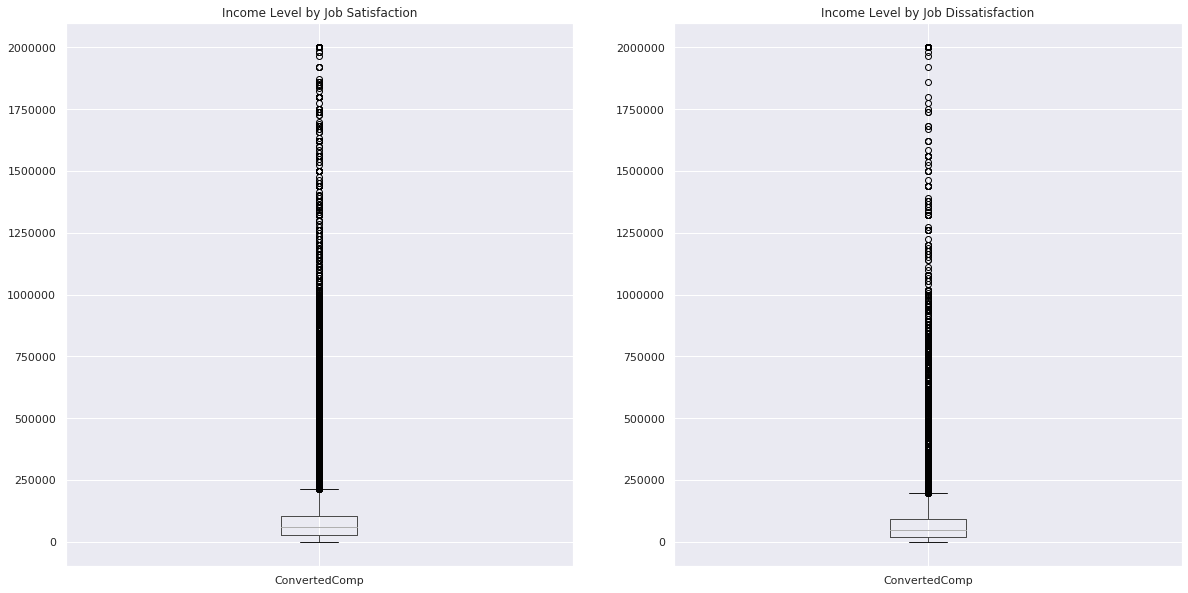

In [24]:
# Exploratory data analysis to undestand outliers for `ConvertedComp`
# matplotlib subplots configurations
fig, axs = plt.subplots(1,2, figsize=(20,10))

# draw a boxplot for job_sat_respondents_df
job_sat_respondents_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Income Level by Job Satisfaction')

# draw a boxplot for dis_sat_job_respondents_df
dis_sat_job_respondents_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Income Level by Job Dissatisfaction')

Text(0.5, 1.0, 'Least Job Satisfaction')

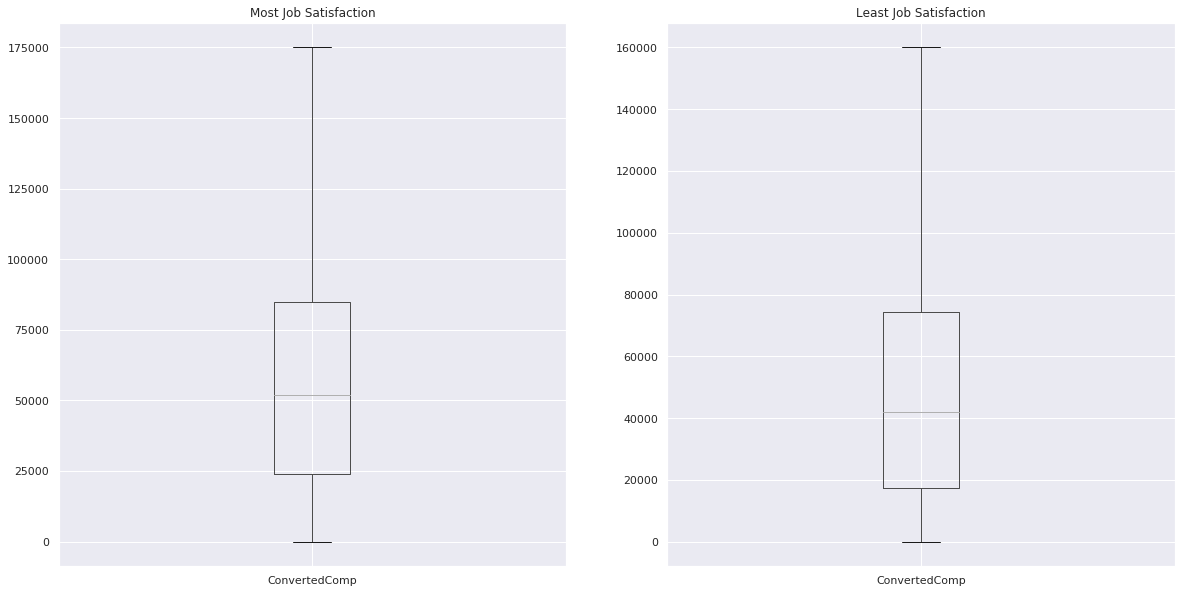

In [25]:
# matplotlib subplots configurations
fig, axs = plt.subplots(1,2, figsize=(20,10))
# ignore the outliers and draw a boxplot for job_sat_respondents_df
job_sat_respondents_df[job_sat_respondents_df['ConvertedComp'] <= 175000].boxplot(column=['ConvertedComp'], 
                                                                                  ax=axs.flatten()[0])
axs[0].set_title('Most Job Satisfaction')

# ignore the outlies and draw a boxplot for dis_sat_job_respondents_df
dis_sat_job_respondents_df[dis_sat_job_respondents_df['ConvertedComp'] <= 160000].boxplot(column=['ConvertedComp'], 
                                                                                          ax=axs.flatten()[1])
axs[1].set_title('Least Job Satisfaction')

In [30]:
# income level group column name
income_level_group_col_name = 'IncomeGroup($)'
# income level group labels
income_level_group_labels = ['25K-50K', '50K-75K','75K-100K','100K-125K','125K-150K', '150K-175K']
# income level group bins 
income_level_group_bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000]

In [42]:
# add a new column `IncomeGroup($)` sat_job_respondents_df with inbund, outbound values
sat_job_respondents_df.loc[:,income_level_group_col_name] = pd.cut(job_sat_respondents_df['ConvertedComp'], 
                                                   bins=income_level_group_bins, labels=income_level_group_labels)

In [43]:
# add a new column `IncomeGroup($)` dis_sat_job_respondents_df with inbund, outbound values
dis_sat_job_respondents_df.loc[:,income_level_group_col_name] = pd.cut(dis_sat_job_respondents_df['ConvertedComp'], 
                                                              bins=income_level_group_bins, labels=income_level_group_labels)

In [46]:
# create a merged df for `IncomeGroup($)` column
merged_income_group_df = merge_sat_and_dsat_by_cols(income_level_group_col_name)

In [47]:
# calculate row percentages and all column percentages for merged_income_group_df
calculate_sat_and_dsat_pecentage(merged_income_group_df)

,IncomeGroup($),SatCount,DisSatCount,SatPercentage,DisSatPercentage,Total,TotalPercentage
0,125K-150K,2013,498,80.17%,19.83%,2511,7.64%
1,150K-175K,987,252,79.66%,20.34%,1239,3.77%
2,100K-125K,2923,752,79.54%,20.46%,3675,11.18%
3,75K-100K,4837,1327,78.47%,21.53%,6164,18.75%
4,50K-75K,7154,2109,77.23%,22.77%,9263,28.17%
5,25K-50K,7379,2651,73.57%,26.43%,10030,30.50%


**Interestingly, the finding reveals that a total of 73.57 percent of those with an annual income between $25K and $50K is satisfied with their job, lower as compared to 80.17 percent and 79.66 percent respectively for those with income from $125K to $150K and $150K to $175K.**

**Gender wise income levels of satisfied employees**

In [72]:
# create a new pandas df with join `Gender`,`JobSat`, and 'ConvertedComp'
gender_income_df = df.copy()[(df['Gender'] == 'Male') | (df['Gender'] == 'Female') ][['Gender', 'ConvertedComp', 'JobSat']]
# remove NAN values from gender_income_df
gender_income_df  = gender_income_df.dropna(axis=0)

In [73]:
# fill gender_income_df with income levels' bins
gender_income_df.loc[:,income_level_group_col_name] = pd.cut(gender_income_df['ConvertedComp'], 
                                                    bins=income_level_group_bins, labels=income_level_group_labels)

# remove NANs for `IncomeGroup($)`   gender_income_df
gender_income_df = gender_income_df.dropna(subset=[income_level_group_col_name],axis=0)

# create a new DF with selected columns
selected_df =  gender_income_df.copy()[['Gender', income_level_group_col_name, 'JobSat']]

In [64]:
# reasgins values for satisfaction
selected_df.loc[selected_df['JobSat'] =='Slightly satisfied', 'JobSat'] = 'Satisfied'
selected_df.loc[selected_df['JobSat'] =='Very satisfied', 'JobSat'] = 'Satisfied'

In [65]:
# group the selected DF for `Gender` and 'IncomeGroup($)'
job_sat_income_gender_df =  selected_df[selected_df['JobSat'] =='Satisfied']\
    .groupby([income_level_group_col_name,'Gender'])\
    .count().reset_index()

In [66]:
# create a df for males
male_df = job_sat_income_gender_df[job_sat_income_gender_df['Gender'] == 'Male'][[income_level_group_col_name,'JobSat']]
# rename `JobSat` as `MaleJobSat`
male_df.columns = [income_level_group_col_name, 'MaleJobSat']

In [67]:
# create a df for female
female_df = job_sat_income_gender_df[job_sat_income_gender_df['Gender'] == 'Female'][[income_level_group_col_name,'JobSat']]
# rename `JobSat` as `FemaleJ`
female_df.columns = [income_level_group_col_name, 'FemaleJobSat']

In [68]:
gender_contact_df = pd.merge(female_df, male_df, on=income_level_group_col_name)
gender_contact_df

,IncomeGroup($),FemaleJobSat,MaleJobSat
0,25K-50K,522,6674
1,50K-75K,532,6434
2,75K-100K,371,4340
3,100K-125K,239,2592
4,125K-150K,161,1794
5,150K-175K,55,904


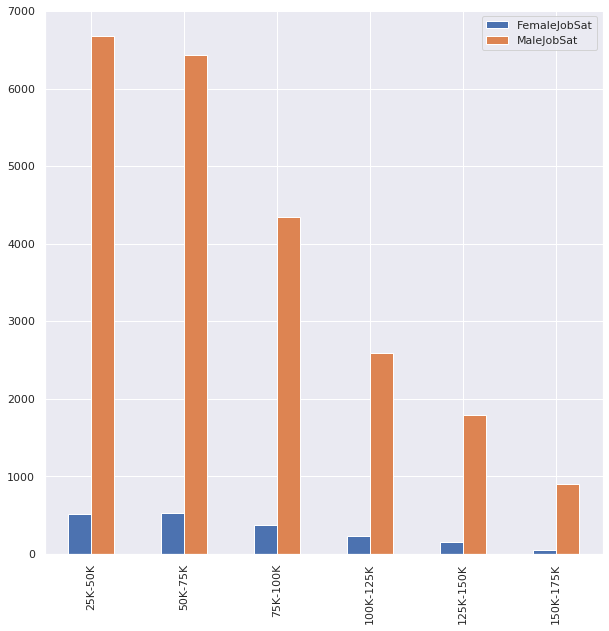

In [71]:
gender_contact_df.index = income_level_group_labels
gender_contact_df.plot(kind='bar',figsize=(10,10) )

**There is a decreasing trend from low to high-income levels between male and female groups.**